# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.118508e+01     7.654004e+00
 * time: 0.0023279190063476562
     1     2.932681e+01     4.533415e+00
 * time: 0.06088089942932129
     2     2.094944e+01     4.393984e+00
 * time: 0.06597781181335449
     3     1.514540e+01     3.166204e+00
 * time: 0.07065296173095703
     4     1.093816e+01     1.430045e+00
 * time: 0.07516098022460938
     5     1.043069e+01     2.389991e+00
 * time: 0.07855796813964844
     6     9.848014e+00     1.456853e+00
 * time: 0.0821678638458252
     7     9.393034e+00     1.422972e+00
 * time: 0.08622598648071289
     8     9.026952e+00     1.110848e+00
 * time: 0.09030985832214355
     9     8.798264e+00     8.672642e-01
 * time: 0.09413790702819824
    10     8.641418e+00     7.371202e-01
 * time: 0.09847378730773926
    11     8.488817e+00     6.280258e-01
 * time: 0.10251498222351074
    12     8.391547e+00     4.847693e-01
 * time: 0.10638594627380371
    13     8.297245e+00     3.061143e-01
 * time

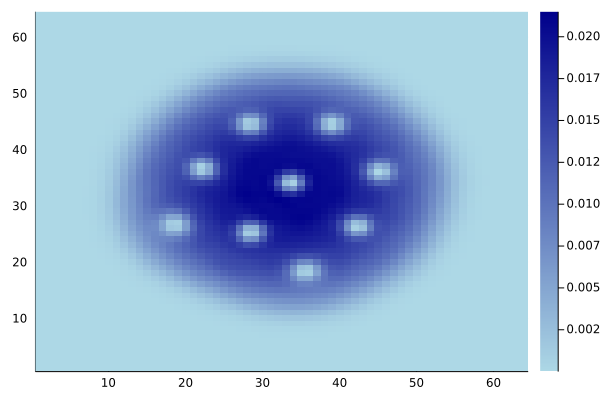

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)